# problema

El radioisótopo $^{208}Tl$ (talio 208) se descompone a $^{208}Pb$ estable (plomo 208) con una semi-vida de 3.053 minutos. Supongamos que comenzamos con una muestra de 1000 átomos de talio. Simulemos la desintegración de estos átomos a lo largo del tiempo, imitando la aleatoriedad de esa desintegración usando números aleatorios. En promedio, sabemos que el número N de átomos en nuestra muestra caerá exponencialmente con el tiempo de acuerdo con la ecuación estándar de desintegración radiactiva:

$$
N(t)=N(0)2^{-t/\tau}
$$

donde $\tau$ es la vida media. Entonces la fracción de átomos que quedan después del tiempo t es $N(t) /N(0) = 2^{-t/\tau}$ y la fracción que se ha desintegrado, que también es igual a la probabilidad $p (t)$ de que cualquier átomo individual en particular se haya desintegrado, es uno menos este número, o

\begin{equation}
    p(t)=1-2^{-t/\tau}
\end{equation}

Por lo tanto, este número representa la probabilidad de que un solo átomo decaiga en un intervalo de tiempo de longitud t.<br>
Simularemos la desintegración de nuestra muestra de 1000 átomos dividiendo los átomos en dos conjuntos, uno de talio y otro de plomo. Inicialmente, todos los átomos están en el conjunto de talio. Dividiremos el tiempo en pasos de tiempo de 1 segundo cada uno y en cada paso de tiempo consideraremos a su vez cada átomo de talio y con la probabilidad dada por la ecuación de arriba, decide si se descompone o no. De esta manera calculamos el número total de átomos de talio que se desintegran en cada segundo, luego restamos este número del total en el conjunto de talio y lo sumamos al total en el conjunto de plomo.
Aquí hay un programa para realizar el cálculo y hacer un gráfico del número de átomos de cada tipo en función del tiempo durante 1000 segundos:

In [7]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show,grid

In [2]:
# Constants
NTl = 1000            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

In [3]:
# Lists of plot points
tpoints = arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []

In [4]:
# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if random()<p:
            decay += 1
    NTl -= decay
    NPb += decay

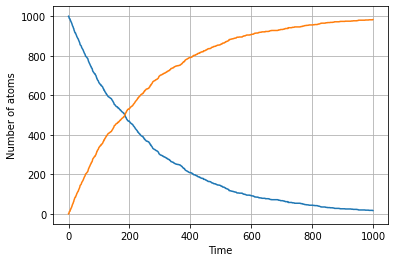

In [8]:
# Make the graph
plot(tpoints,Tlpoints)
plot(tpoints,Pbpoints)
xlabel("Time")
ylabel("Number of atoms")
grid()
show()